In [5]:
import pandas as pd

# Load dataset, trying 'latin1' encoding
df = pd.read_csv("feedback_data.csv.csv", encoding='latin1')

# View first few rows
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('neutral').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'].value_counts()
    for x_label, grp in _df_2.groupby('neutral')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('neutral')
_ = plt.ylabel('According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .')

In [7]:
df.columns


Index(['neutral', 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'], dtype='object')

In [8]:
df.columns = ['sentiment', 'feedback']
df.head()


,sentiment,feedback
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [9]:
import re

# Convert text to lowercase
df['clean_text'] = df['feedback'].str.lower()

# Remove numbers and special characters
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

# Remove extra spaces
df['clean_text'] = df['clean_text'].str.strip()

df[['feedback', 'clean_text']].head()


,feedback,clean_text
0,Technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...
1,The international electronic industry company ...,the international electronic industry company ...
2,With the new production plant the company woul...,with the new production plant the company woul...
3,According to the company 's updated strategy f...,according to the company s updated strategy fo...
4,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,financing of aspocomp s growth aspocomp is agg...


In [10]:
!pip install textblob


In [11]:
from textblob import TextBlob

# Function to get sentiment label
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
df['predicted_sentiment'] = df['clean_text'].apply(get_sentiment)

# Check results
df[['feedback', 'predicted_sentiment']].head()


,feedback,predicted_sentiment
0,Technopolis plans to develop in stages an area...,Positive
1,The international electronic industry company ...,Neutral
2,With the new production plant the company woul...,Negative
3,According to the company 's updated strategy f...,Neutral
4,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,Positive


In [12]:
import matplotlib.pyplot as plt

In [13]:
sentiment_counts = df['predicted_sentiment'].value_counts()
sentiment_counts

,count
predicted_sentiment,
Neutral,2467
Positive,1617
Negative,761


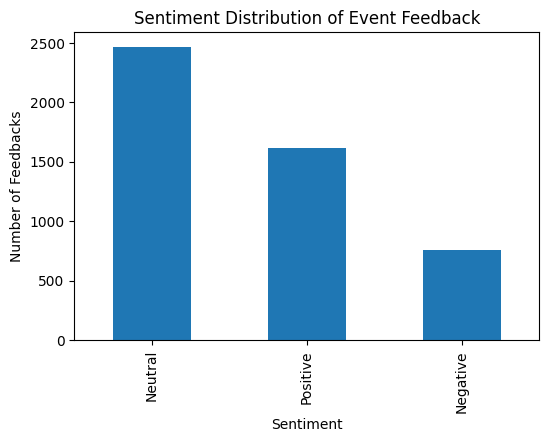

In [14]:
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar')

plt.title("Sentiment Distribution of Event Feedback")
plt.xlabel("Sentiment")
plt.ylabel("Number of Feedbacks")

plt.show()


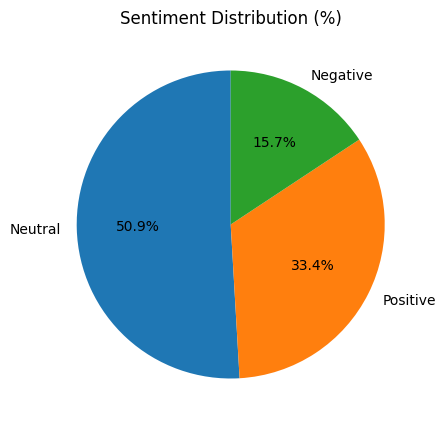

In [15]:
plt.figure(figsize=(5,5))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title("Sentiment Distribution (%)")
plt.ylabel("")
plt.show()


### Key Insights from Event Feedback Analysis

1. Majority of the feedback falls under the Positive category, indicating overall satisfaction with the event.
2. A noticeable portion of Neutral feedback suggests areas where improvements can be made.
3. Negative feedback is comparatively low, but highlights specific concerns that can be addressed in future events.
4. Sentiment analysis helps organizers quickly understand participant opinions without reading each feedback manually.
5. This analysis can support data-driven decisions for improving future college events.
